# Análisis de compañías del S&P 500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [103]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [104]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [105]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [106]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [107]:
print(df_simbolos)

    Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry  
0              Industrial Conglomerates  
1                     Building Products  
2                 Health Care Equipment  
3                       Pharmaceuticals  
4                 Health Care Equipment  
..                         

In [108]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [109]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\3397331766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\3397331766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


In [110]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [111]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [16]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [115]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800


NOW                                                          \
             Open       High        Low      Close  Adj Close      Volume   
Date                                                                        
2012-06-29  23.75  24.750000  22.830000  24.600000  24.600000  10922400.0   
2012-07-02  24.75  25.200001  24.100000  24.770000  24.770000    656700.0   
2012-07-03  24.85  25.320000  24.600000  25.309999  25.309999    401100.0   
2012-07-05  25.50  26.260000  25.139999  25.959999  25.959999    541000.0   
2012-07-06  25.75  26.120001  25.100000  25.840000  25.840000    355100.0   
...           ...        ...        ...        ...        ...         ...   
2012-06-26    NaN        NaN        NaN        NaN        NaN         NaN   
2012-06-27    NaN        NaN        NaN        NaN        NaN         NaN   
2012-06-28    NaN        NaN        NaN        NaN        NaN         NaN   
2020-12-31    NaN        NaN        NaN        NaN        NaN         NaN   
2001-09-12    NaN        NaN        NaN        NaN        NaN         NaN   

                 MSFT                                   ...        WDC  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2012-06-29  30.450001  30.690001  30.139999  30.590000  ...  29.240000   
2012-07-02  30.620001  30.620001  30.209999  30.559999  ...  29.580000   
2012-07-03  30.230000  30.760000  30.170000  30.760000  ...  29.799999   
2012-07-05  30.590000  30.780001  30.379999  30.700001  ...  30.510000   
2012-07-06  30.610001  30.700001  29.950001  30.190001  ...  30.049999   
...               ...        ...        ...        ...  ...        ...   
2012-06-26  30.000000  30.270000  29.940001  30.020000  ...  29.000000   
2012-06-27  30.190001  30.500000  30.030001  30.170000  ...  28.969999   
2012-06-28  29.980000  30.049999  29.420000  29.910000  ...  28.309999   
2020-12-31        NaN        NaN        NaN        NaN  ...        NaN   
2001-09-12        NaN        NaN        NaN        NaN  ...        NaN   

                                             HBAN                              \
                Close  Adj Close     Volume  Open  High   Low Close Adj Close   
Date                                                                            
2012-06-29  30.480000  24.469276  7354900.0  6.32  6.40  6.31  6.40  4.600000   
2012-07-02  29.840000  23.955490  3240600.0  6.40  6.50  6.33  6.48  4.657501   
2012-07-03  30.980000  24.870678  2332900.0  6.48  6.55  6.45  6.51  4.679064   
2012-07-05  30.680000  24.629841  3667600.0  6.49  6.54  6.41  6.42  4.614375   
2012-07-06  31.020000  24.902796  5743800.0  6.35  6.45  6.34  6.38  4.585625   
...               ...        ...        ...   ...   ...   ...   ...       ...   
2012-06-26  29.129999  23.385502  3359200.0  6.15  6.28  6.13  6.19  4.449063   
2012-06-27  29.799999  23.923378  3003700.0  6.21  6.24  6.15  6.16  4.427500   
2012-06-28  28.799999  23.120577  8112700.0  6.13  6.20  6.09  6.19  4.449063   
2020-12-31        NaN        NaN        NaN   NaN   NaN   NaN   NaN       NaN   
2001-09-12        NaN        NaN        NaN   NaN   NaN   NaN   NaN       NaN   

                        
                Volume  
Date                    
2012-06-29  10338400.0  
2012-07-02   8644100.0  
2012-07-03   4217600.0  
2012-07-05   9590900.0  
2012-07-06   9436900.0  
...                ...  
2012-06-26   9130200.0  
2012-06-27  11117600.0  
2012-06-28  16335500.0  
2020-12-31         NaN  
2001-09-12         NaN  

[5285 rows x 3018 columns]

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista par posteriomente concatenarlos en un solo DataFrame Global

In [55]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Close']/x['Open']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [56]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
2140,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Monday,2000-01
2141,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Tuesday,2000-01
2142,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Wednesday,2000-01
2143,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Thursday,2000-01
2144,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2020-12-24,50.310001,50.380001,49.349998,49.919998,49.919998,1224500.0,WDC,0.007582,-0.007782,-0.000200,67.794897,Thursday,2020-12
2137,2020-12-28,50.590000,50.970001,49.630001,50.060001,50.060001,2763400.0,WDC,0.013332,-0.010532,0.002805,67.773085,Monday,2020-12
2138,2020-12-29,50.639999,50.639999,48.230000,48.290001,48.290001,4622400.0,WDC,0.011519,-0.047517,-0.035358,67.733528,Tuesday,2020-12
2139,2020-12-30,48.279999,50.290001,48.279999,49.529999,49.529999,3965400.0,WDC,-0.000207,0.025561,0.025678,67.765785,Wednesday,2020-12


In [57]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [58]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
2140,Monday,0.000000
2141,Tuesday,0.000000
2142,Wednesday,0.000000
2143,Thursday,0.000000
2144,Friday,0.000000
...,...,...
2136,Thursday,0.007582
2137,Monday,0.013332
2138,Tuesday,0.011519
2139,Wednesday,-0.000207


In [59]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


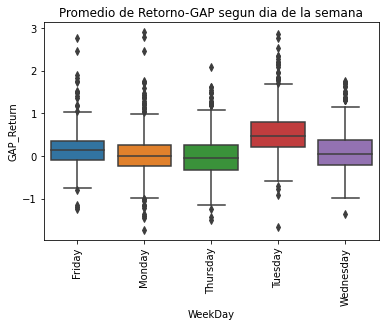

In [60]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [61]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000156
Monday,0.000030
Thursday,-0.000007
Tuesday,0.000500
Wednesday,0.000099


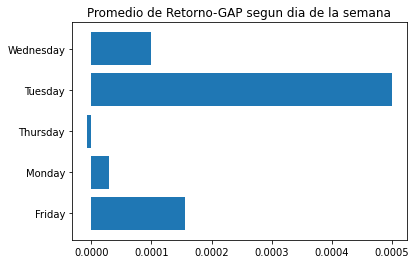

In [62]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

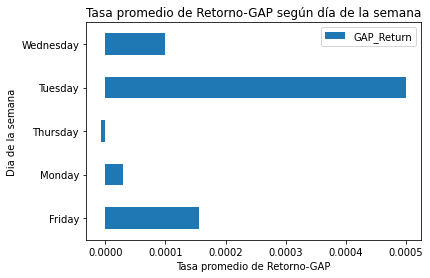

In [63]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

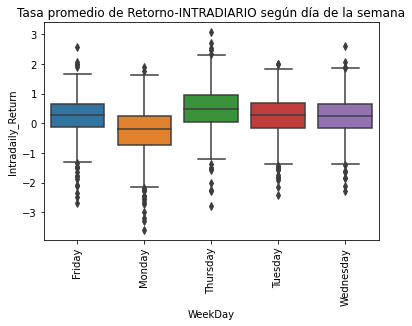

In [64]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [65]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
2140,Monday,0.000000
2141,Tuesday,0.000000
2142,Wednesday,0.000000
2143,Thursday,0.000000
2144,Friday,0.000000
...,...,...
2136,Thursday,-0.007782
2137,Monday,-0.010532
2138,Tuesday,-0.047517
2139,Wednesday,0.025561


In [66]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,0.000214
Monday,-0.000297
Thursday,0.000453
Tuesday,0.000231
Wednesday,0.000205


<Figure size 720x720 with 0 Axes>

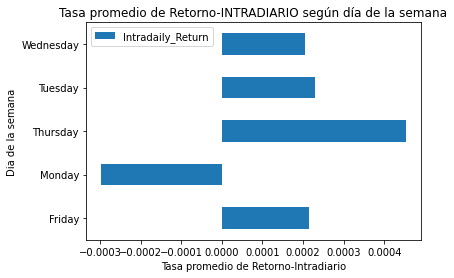

In [67]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [142]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1)
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [69]:

df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Monday,2000-01,ServiceNow,Information Technology,Systems Software
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Tuesday,2000-01,ServiceNow,Information Technology,Systems Software
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Wednesday,2000-01,ServiceNow,Information Technology,Systems Software
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Thursday,2000-01,ServiceNow,Information Technology,Systems Software
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NOW,0.000000,0.000000,NaN,NaN,Friday,2000-01,ServiceNow,Information Technology,Systems Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,50.310001,50.380001,49.349998,49.919998,49.919998,1224500.0,WDC,0.007582,-0.007782,-0.000200,67.794897,Thursday,2020-12,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"
2658351,2020-12-28,50.590000,50.970001,49.630001,50.060001,50.060001,2763400.0,WDC,0.013332,-0.010532,0.002805,67.773085,Monday,2020-12,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"
2658352,2020-12-29,50.639999,50.639999,48.230000,48.290001,48.290001,4622400.0,WDC,0.011519,-0.047517,-0.035358,67.733528,Tuesday,2020-12,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"
2658353,2020-12-30,48.279999,50.290001,48.279999,49.529999,49.529999,3965400.0,WDC,-0.000207,0.025561,0.025678,67.765785,Wednesday,2020-12,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"


In [70]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Information Technology,0.000000
1,Information Technology,0.000000
2,Information Technology,0.000000
3,Information Technology,0.000000
4,Information Technology,0.000000
...,...,...
2658350,Information Technology,0.007582
2658351,Information Technology,0.013332
2658352,Information Technology,0.011519
2658353,Information Technology,-0.000207


In [71]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000073
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000117
Financials,0.000120
Health Care,0.000157
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

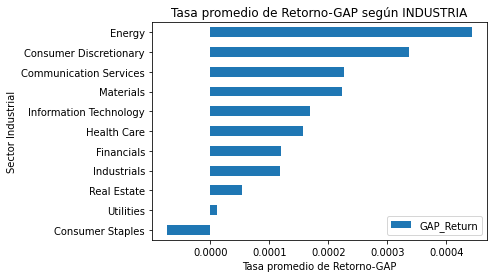

In [72]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [73]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Information Technology,0.000000
1,Information Technology,0.000000
2,Information Technology,0.000000
3,Information Technology,0.000000
4,Information Technology,0.000000
...,...,...
2658350,Information Technology,-0.007782
2658351,Information Technology,-0.010532
2658352,Information Technology,-0.047517
2658353,Information Technology,0.025561


In [74]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Energy,-0.000297
Communication Services,0.000032
Materials,0.000050
Consumer Discretionary,0.000101
Financials,0.000120
Information Technology,0.000196
Utilities,0.000200
Real Estate,0.000206
Industrials,0.000242


<Figure size 720x720 with 0 Axes>

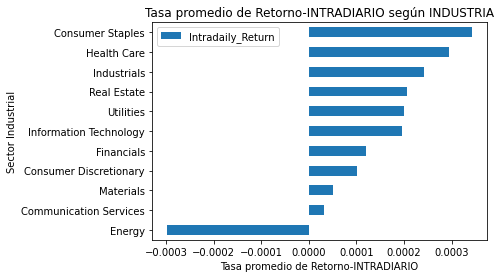

In [75]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [76]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
4572,2009-09,214.222175
4571,2009-09,213.994103
4570,2009-09,213.990592
4575,2009-09,213.760671
4574,2009-09,213.593353
...,...,...
2385,2000-12,NaN
2386,2000-12,NaN
2387,2000-12,NaN
2388,2000-12,NaN


In [77]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.416128
2009-07,69.991791
2009-05,69.977356
2009-08,69.496298
2009-04,68.602766
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [78]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [79]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.416128
2009-07,69.991791
2009-05,69.977356
2009-08,69.496298
2009-04,68.602766
2009-09,68.382571
2009-03,66.476787
2009-02,64.117517
2009-10,62.751262


<Figure size 720x720 with 0 Axes>

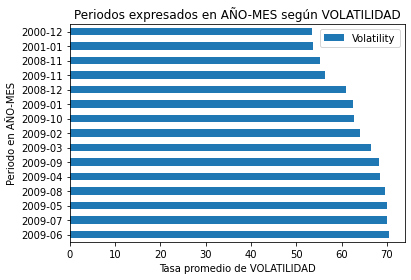

In [80]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [152]:
df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()


In [153]:
tickers

Index(['NOW', 'MSFT', 'UPS', 'CVX', 'DISH', 'BRK-B', 'BF-B', 'PENN', 'LYB',
       'AMT',
       ...
       'INTC', 'ELV', 'WAB', 'TGT', 'EXPD', 'AAP', 'PSA', 'WYNN', 'WDC',
       'HBAN'],
      dtype='object', length=503)

In [93]:
df_TYL=df_data.loc[:,'TYL']
df_TYL.reset_index(inplace=True)

df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
df_TYL.set_index(['Date'],inplace=True)

#df_TYL=df_TYL['Adj Close']

df_TYL

C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\2417216141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\2417216141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)


,TYL
Date,
2012-06-29,40.349998
2012-07-02,40.849998
2012-07-03,41.549999
2012-07-05,41.700001
2012-07-06,40.759998
...,...
2012-06-26,38.930000
2012-06-27,38.959999
2012-06-28,38.820000


# Comprender el precio de cierre ajustado
Los valores de las acciones se expresan en términos del precio de cierre y el precio de cierre ajustado. El precio de cierre es el precio sin procesar, que es solo el valor en efectivo del último precio negociado antes del cierre del mercado. El precio de cierre ajustado tiene en cuenta cualquier cosa que pueda afectar el precio de las acciones después del cierre del mercado.

In [154]:
list_tickers=[]
df_empresas=pd.DataFrame
for i in tickers:
    df_AdjClose_tickers=df_data.loc[:,i]
    df_AdjClose_tickers.reset_index(inplace=True)
    df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
    df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
    df_AdjClose_tickers.set_index(['Date'],inplace=True)
    
    list_tickers.append(df_AdjClose_tickers)
df_empresas=list_tickers[0]
df_empresas



C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\1027477502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\1027477502.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
C:\Users\PCMYM\AppData\Local\Temp\ipykernel_11632\1027477502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,NOW
Date,
2012-06-29,24.600000
2012-07-02,24.770000
2012-07-03,25.309999
2012-07-05,25.959999
2012-07-06,25.840000
...,...
2012-06-26,NaN
2012-06-27,NaN
2012-06-28,NaN


In [155]:
df_global_empresa2=df_empresas

In [156]:
i=1
while i<503:
    df_global_empresa2= df_global_empresa2.merge(list_tickers[i], how='left', left_index=True, right_index=True)
    i=i+1


In [158]:
df_global_empresa2

,NOW,MSFT,UPS,CVX,DISH,BRK-B,BF-B,PENN,LYB,AMT,...,INTC,ELV,WAB,TGT,EXPD,AAP,PSA,WYNN,WDC,HBAN
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,24.600000,24.976383,58.631733,69.779556,27.778795,83.330002,22.027624,10.081393,24.572069,58.117352,...,19.852877,54.882759,37.186481,44.192711,33.844666,64.644753,103.439972,78.552879,24.469276,4.600000
2012-07-02,24.770000,24.951885,58.579613,70.017647,27.944202,83.650002,22.048094,10.056523,24.925980,59.439140,...,19.867773,53.566387,37.210323,44.253483,33.870861,64.123550,103.962860,77.363831,23.955490,4.657501
2012-07-03,25.309999,25.115185,59.160294,71.016380,28.070692,83.779999,21.936646,10.052001,25.591074,59.380955,...,20.009317,52.723236,37.391464,43.881344,34.290104,65.573357,103.941353,76.909424,24.870678,4.679064
2012-07-05,25.959999,25.066198,59.487843,70.130081,27.769066,83.220001,21.613680,10.169568,25.816843,59.206379,...,19.778383,52.697411,37.315189,43.402885,34.316315,65.194321,103.268044,77.113884,24.629841,4.614375
2012-07-06,25.840000,24.649788,59.085823,69.495125,27.710686,82.540001,21.406708,10.205743,25.109032,58.848915,...,19.487844,51.544533,36.552490,44.101578,33.434155,65.431236,103.583214,76.258087,24.902796,4.585625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-26,NaN,24.510986,56.845078,66.770081,26.358234,81.330002,21.775164,10.040696,24.120527,56.806705,...,19.376108,59.451263,35.131954,43.767418,32.683022,62.398922,100.316956,77.280502,23.385502,4.449063
2012-06-27,NaN,24.633461,57.165176,67.841560,26.562561,81.980003,21.372593,10.042957,23.736124,57.701691,...,19.532551,59.786827,35.370293,43.714256,32.683022,62.152550,100.431526,77.553154,23.923378,4.427500
2012-06-28,NaN,24.421173,57.403408,68.430237,26.805807,82.339996,21.538628,9.929912,23.565260,57.926163,...,19.242010,56.698124,36.314140,43.638317,32.508350,62.266270,100.975937,77.257812,23.120577,4.449063


In [159]:
mean_returns=mean_historical_return(df_global_empresa2,frequency=252)


In [160]:
mean_returns

NOW     0.159463
MSFT   -0.001072
UPS    -0.001009
CVX    -0.000931
DISH   -0.001699
          ...   
AAP    -0.001786
PSA    -0.001149
WYNN   -0.000793
WDC    -0.002700
HBAN   -0.001590
Length: 503, dtype: float64

In [161]:
mean_returns_ordered=mean_returns.sort_values(ascending=False)
empresas_recomendadas=mean_returns_ordered[:9]
df_empresas_recomendadas= pd.DataFrame(empresas_recomendadas, columns=['Mean Historical Return'])
df_empresas_recomendadas.reset_index(inplace=True)
df_empresas_recomendadas.rename(columns={'index':'Ticker'},inplace=True) 
df_empresas_recomendadas

,Ticker,Mean Historical Return
0,PAYC,0.192230
1,CZR,0.162900
2,SEDG,0.161774
3,NOW,0.159463
4,MRNA,0.130819
5,PYPL,0.107927
6,CDW,0.106960
7,ETSY,0.104601
8,ANET,0.091020


In [143]:
df_empresas_recomendadas=df_empresas_recomendadas.merge(df_simbolos, on='Ticker', how='left')
df_empresas_recomendadas

,Ticker,Mean Historical Return,Security,GICS Sector,GICS Sub-Industry
0,PAYC,0.192230,Paycom,Information Technology,Application Software
1,CZR,0.162900,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming
2,SEDG,0.161774,SolarEdge,Information Technology,Semiconductor Equipment
3,NOW,0.159463,ServiceNow,Information Technology,Systems Software
4,MRNA,0.130819,Moderna,Health Care,Biotechnology
5,PYPL,0.107927,PayPal,Information Technology,Data Processing & Outsourced Services
6,CDW,0.106960,CDW,Information Technology,Technology Distributors
7,ETSY,0.104601,Etsy,Consumer Discretionary,Internet & Direct Marketing Retail
8,ANET,0.091020,Arista Networks,Information Technology,Communications Equipment


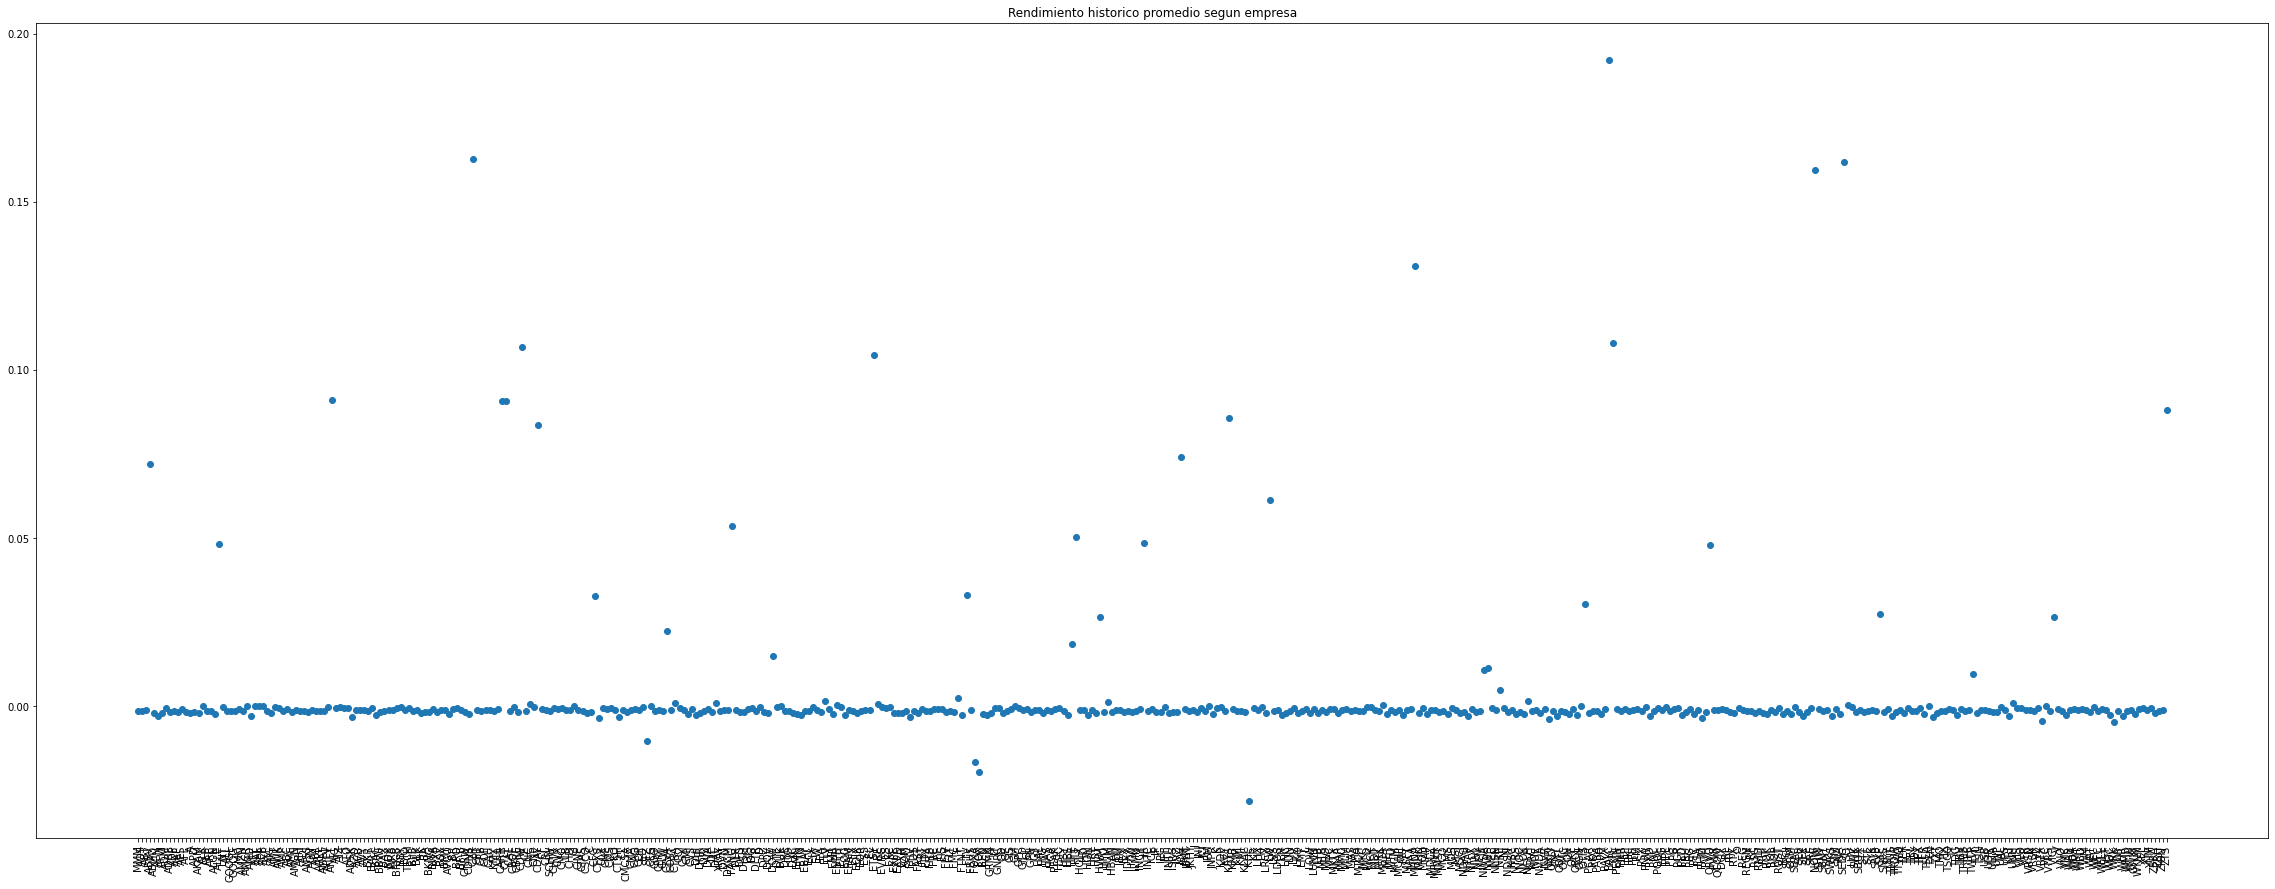

In [144]:
plt.figure(figsize=(40,15))
plt.plot(mean_returns,linestyle='None',marker='o')
plt.xticks(rotation=90)
plt.title('Rendimiento historico promedio segun empresa')
plt.show()

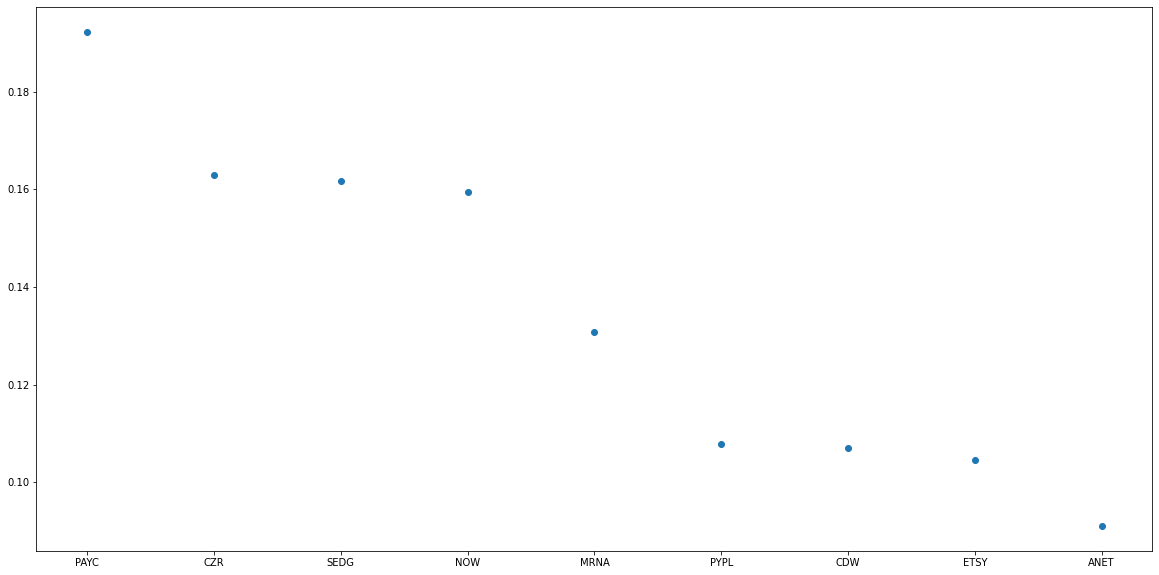

In [145]:
plt.figure(figsize=(20,10))
plt.plot(empresas_recomendadas,linestyle='None',marker='o')
plt.show()

In [149]:
lista_recomendadas=df_empresas_recomendadas['Security']
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['Paycom',
 'Caesars Entertainment',
 'SolarEdge',
 'ServiceNow',
 'Moderna',
 'PayPal',
 'CDW',
 'Etsy',
 'Arista Networks']

In [151]:
print("Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: ")
for i in lista_recomendadas:
    print(f'- {i}')

Las 9 mejores empresas para invertir segun el promedio de sus rendimientos historicos son: 
- Paycom
- Caesars Entertainment
- SolarEdge
- ServiceNow
- Moderna
- PayPal
- CDW
- Etsy
- Arista Networks
